In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3004396,County,Lt BOURKE STREET,KING STREET,WILLIAM STREET,3,2594N,22/12/2011 01:55:12 PM,22/12/2011 02:25:05 PM,1793,1P TKT A M-SAT 7:30-19:30,0,907,1284
11155210,Titles,WILLS STREET,A'BECKETT STREET,LA TROBE STREET,2,5178E,29/08/2012 03:33:25 PM,29/08/2012 03:50:44 PM,1039,2P MTR M-SAT 7:30-20:30,0,1433,5726
7136161,Queensberry,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10194E,30/04/2012 04:27:25 PM,30/04/2012 04:36:55 PM,570,1P TKT A M-F 7:30-18:30,0,641,3406
797820,Southbank,GRANT STREET,DODDS STREET,WELLS STREET,3,9904N,23/10/2011 03:23:01 PM,23/10/2011 03:39:34 PM,993,3P SUN 7:30-18:30,0,728,4693
8839723,Victoria Market,ELIZABETH STREET,THERRY STREET,FRANKLIN STREET,5,4003W,21/06/2012 09:59:04 AM,21/06/2012 10:02:43 AM,219,1/2P TKT A M-SAT 7:30-19:30,0,627,4970


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3543777,Queensberry,CURZON STREET,QUEENSBERRY STREET,ELM STREET,5,10111W,11/01/2012 10:49:47 AM,11/01/2012 11:29:43 AM,2396,2P M-F 7:30-18:30,0,562,2334
2731267,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,15/12/2011 10:59:25 AM,15/12/2011 11:06:39 AM,434,LZ 15M M-SAT 7:30-19:30,0,1346,3770
448937,County,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3281S,14/10/2011 12:01:17 AM,14/10/2011 03:33:03 AM,12706,2P DIS AOT 0:00-7:00,1,894,1859
7030049,Princes Theatre,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2359S,26/04/2012 07:41:02 PM,26/04/2012 08:00:00 PM,1138,P TKT A M-SAT 19:30-20:00,0,123,1395
7003557,Princes Theatre,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5,435W,26/04/2012 10:32:38 AM,26/04/2012 11:30:52 AM,3494,1P TKT A M-SAT 7:30-19:30,0,647,173


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1008
Princes Theatre     733
Victoria Market     724
Regency             671
The Mac             635
Southbank           607
Hyatt               594
Titles              523
Rialto              442
City Square         435
County              423
Courtney            417
Chinatown           401
Hardware            396
Magistrates         391
Banks               379
Spencer             324
RACV                324
Jolimont            281
Supreme             197
Docklands            52
Tavistock            38
West Melbourne        5
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3004396,COUNTY,LT BOURKE STREET,KING STREET,WILLIAM STREET,3,2594N,22/12/2011 01:55:12 PM,22/12/2011 02:25:05 PM,1793,1P TKT A M-SAT 7:30-19:30,0,907,1284
11155210,TITLES,WILLS STREET,A'BECKETT STREET,LA TROBE STREET,2,5178E,29/08/2012 03:33:25 PM,29/08/2012 03:50:44 PM,1039,2P MTR M-SAT 7:30-20:30,0,1433,5726
7136161,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10194E,30/04/2012 04:27:25 PM,30/04/2012 04:36:55 PM,570,1P TKT A M-F 7:30-18:30,0,641,3406
797820,SOUTHBANK,GRANT STREET,DODDS STREET,WELLS STREET,3,9904N,23/10/2011 03:23:01 PM,23/10/2011 03:39:34 PM,993,3P SUN 7:30-18:30,0,728,4693
8839723,VICTORIA MARKET,ELIZABETH STREET,THERRY STREET,FRANKLIN STREET,5,4003W,21/06/2012 09:59:04 AM,21/06/2012 10:02:43 AM,219,1/2P TKT A M-SAT 7:30-19:30,0,627,4970


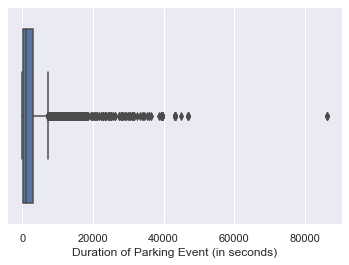

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             981
QUEEN STREET                752
LA TROBE STREET             567
EXHIBITION STREET           564
FRANKLIN STREET             554
COLLINS STREET              524
ELIZABETH STREET            516
RUSSELL STREET              474
BOURKE STREET               407
LT LONSDALE STREET          369
FLINDERS LANE               287
LT COLLINS STREET           286
SPRING STREET               279
KING STREET                 235
ERROL STREET                231
WILLIAM STREET              210
LT BOURKE STREET            185
COVENTRY STREET             163
A'BECKETT STREET            157
VICTORIA STREET             154
FLINDERS STREET             142
QUEENSBERRY STREET          118
SPENCER STREET              110
CAPEL STREET                108
ALBERT STREET                91
LEVESON STREET               86
THERRY STREET                83
O'CONNELL STREET             79
DORCAS STREET                78
GRANT STREET                 77
KAVANAGH STREET              73
COBDEN S

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            923
QUEEN STREET           784
QUEENSBERRY STREET     668
WILLIAM STREET         625
RUSSELL STREET         554
SWANSTON STREET        503
EXHIBITION STREET      477
SPENCER STREET         472
LT LONSDALE STREET     444
LT COLLINS STREET      353
LONSDALE STREET        350
VICTORIA STREET        299
BOURKE STREET          280
COLLINS STREET         273
ELIZABETH STREET       264
LT BOURKE STREET       224
LA TROBE STREET        192
FLINDERS LANE          190
WILLAM STREET          162
FRANKLIN STREET        142
THERRY STREET          141
A'BECKETT STREET       121
WELLS STREET           112
DODDS STREET            97
FLINDERS STREET         92
ERROL STREET            87
SOUTHBANK BOULEVARD     85
O'CONNELL STREET        83
KINGS WAY               81
STURT STREET            80
VICTORIA PARADE         65
PEEL STREET             63
BALSTON STREET          63
PELHAM STREET           59
HOWARD STREET           59
COBDEN STREET           49
MACARTHUR STREET        47
G

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         874
VICTORIA STREET        828
ELIZABETH STREET       808
QUEEN STREET           773
EXHIBITION STREET      543
SPRING STREET          473
KING STREET            472
LONSDALE STREET        468
RUSSELL STREET         435
FLINDERS LANE          365
COLLINS STREET         353
LT BOURKE STREET       350
LT COLLINS STREET      280
SWANSTON STREET        264
LT LONSDALE STREET     233
LA TROBE STREET        232
BOURKE STREET          224
FLINDERS STREET        190
FRANKLIN STREET        141
DODDS STREET           134
ST KILDA ROAD          112
LANSDOWNE STREET        98
QUEENSBERRY STREET      98
POWER STREET            87
LEVESON STREET          87
THERRY STREET           83
A'BECKETT STREET        80
WELLS STREET            70
WALSH STREET            56
CAPEL STREET            55
HAWKE STREET            54
MILES STREET            46
STURT STREET            42
DUDLEY STREET           40
ELM STREET              40
KAVANAGH STREET         33
GISBORNE STREET         33
S

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3004396,COUNTY,LT BOURKE STREET,KING STREET,WILLIAM STREET,3,2594N,2011-12-22 13:55:12,2011-12-22 14:25:05,1793,1P TKT A M-SAT 7:30-19:30,0,907,1284
11155210,TITLES,WILLS STREET,A'BECKETT STREET,LA TROBE STREET,2,5178E,2012-08-29 15:33:25,2012-08-29 15:50:44,1039,2P MTR M-SAT 7:30-20:30,0,1433,5726
7136161,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10194E,2012-04-30 16:27:25,2012-04-30 16:36:55,570,1P TKT A M-F 7:30-18:30,0,641,3406
797820,SOUTHBANK,GRANT STREET,DODDS STREET,WELLS STREET,3,9904N,2011-10-23 15:23:01,2011-10-23 15:39:34,993,3P SUN 7:30-18:30,0,728,4693
8839723,VICTORIA MARKET,ELIZABETH STREET,THERRY STREET,FRANKLIN STREET,5,4003W,2012-06-21 09:59:04,2012-06-21 10:02:43,219,1/2P TKT A M-SAT 7:30-19:30,0,627,4970


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3543777,QUEENSBERRY,CURZON STREET,QUEENSBERRY STREET,ELM STREET,5,10111W,2012-11-01 10:49:47,2012-11-01 11:29:43,2396,2P M-F 7:30-18:30,0,562,2334
2731267,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2011-12-15 10:59:25,2011-12-15 11:06:39,434,LZ 15M M-SAT 7:30-19:30,0,1346,3770
448937,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,4,3281S,2011-10-14 00:01:17,2011-10-14 03:33:03,12706,2P DIS AOT 0:00-7:00,1,894,1859
7030049,PRINCES THEATRE,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2359S,2012-04-26 19:41:02,2012-04-26 20:00:00,1138,P TKT A M-SAT 19:30-20:00,0,123,1395
7003557,PRINCES THEATRE,EXHIBITION STREET,BOURKE STREET,LT COLLINS STREET,5,435W,2012-04-26 10:32:38,2012-04-26 11:30:52,3494,1P TKT A M-SAT 7:30-19:30,0,647,173


### KNN Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

3004396     0
11155210    1
7136161     2
797820      3
8839723     4
5164713     5
4862484     4
8503966     6
4450894     5
12155108    7
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
3004396,0,0,0,0,0,3,1793,907,1284,13,14
11155210,1,1,1,1,0,2,1039,1433,5726,15,15
7136161,2,2,2,2,0,2,570,641,3406,16,16
797820,3,3,3,3,0,3,993,728,4693,15,15
8839723,4,4,4,4,0,5,219,627,4970,9,10
5164713,5,5,5,5,0,5,107,1221,490,14,14
4862484,6,6,6,6,0,5,1552,627,551,13,14
8503966,7,7,1,7,0,2,681,1285,6009,13,13
4450894,6,8,7,7,1,5,3075,1221,509,10,11
12155108,8,0,0,8,0,4,216,528,1293,14,14


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 71.6min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 97.2min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 2
Best weights: distance
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7813
1,auto,10,1,1,distance,0.7813
2,auto,10,1,2,uniform,0.7224
3,auto,10,1,2,distance,0.7224
4,auto,10,1,5,uniform,0.6985
5,auto,10,1,5,distance,0.6985
6,auto,10,2,1,uniform,0.7397
7,auto,10,2,1,distance,0.7814
8,auto,10,2,2,uniform,0.6877
9,auto,10,2,2,distance,0.7224


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.296
Score with 2 selected features: 0.7185
Score with 3 selected features: 0.732
Score with 4 selected features: 0.887
Score with 5 selected features: 0.993
Score with 6 selected features: 0.993
Score with 7 selected features: 0.9935

Indexs of the desired features
[2, 3, 1, 0, 7, 10, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,Between Street 1,Area Name,Street ID,Departure Hour,Side Of Street
3004396,0,0,0,0,907,14,3
11155210,1,1,1,1,1433,15,2
7136161,2,2,2,2,641,16,2
797820,3,3,3,3,728,15,3
8839723,4,4,4,4,627,10,5
5164713,5,5,5,5,1221,14,5
4862484,6,6,6,6,627,14,5
8503966,1,7,7,7,1285,13,2
4450894,7,7,8,6,1221,11,5
12155108,0,8,0,8,528,14,4


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 54.7min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.9919
1,auto,10,1,1,distance,0.9919
2,auto,10,1,2,uniform,0.9873
3,auto,10,1,2,distance,0.9873
4,auto,10,1,5,uniform,0.9836
5,auto,10,1,5,distance,0.9836
6,auto,10,2,1,uniform,0.9874
7,auto,10,2,1,distance,0.9919
8,auto,10,2,2,uniform,0.9796
9,auto,10,2,2,distance,0.9873


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[ 92   0   0 ...   0   0   0]
 [  0  12   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ...  14   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]

[Train/test split] score: 0.98920



 Accuracy score: 0.98920

 Misclassification Rate: 0.00000

 True Positive Rate: 1.00000

 True Negative Rate: 1.00000

 Precision : 1.00000

 Prevalence : 0.11538

 F score : 1.00000

 False Positive Rate: 0.00000


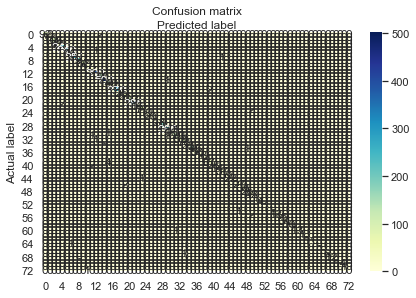

In [36]:
#Name of classes
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

#Printing the numerical result of the confusion matrix
print("\n Accuracy score: {:.5f}".format(knn.score(x_test, y_test)))
misclassification_error = (FP + FN) / float(TP + TN + FP + FN)
print("\n Misclassification Rate: {:.5f}".format(misclassification_error))
sensitivity = TP / float(FN + TP)
print("\n True Positive Rate: {:.5f}".format(sensitivity))
specificity = TN / (TN + FP)
print("\n True Negative Rate: {:.5f}".format(specificity))
precision = TP / float(TP + FP)
print("\n Precision : {:.5f}".format(precision))
prevalence =  float(FN + TP)/float(TP + TN + FP + FN)
print("\n Prevalence : {:.5f}".format(prevalence))
fscore = (2 * precision * sensitivity) / (precision + sensitivity)
print("\n F score : {:.5f}".format(fscore))
print("\n False Positive Rate: {:.5f}".format(1-specificity))

In [37]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.99350
[fold 1] score: 0.99600
[fold 2] score: 0.99450
[fold 3] score: 0.99500
[fold 4] score: 0.99300

KNN mean score [5 folds] = 0.9944
